<a href="https://colab.research.google.com/github/znjubery/hpc-ai-intro_2025/blob/main/Random_Forest_Tuning_Parallel_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyperparameter Tuning with Parallel Processing on Iris Dataset

## Step 1: Load and Split Dataset

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split Dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print("Train and test sets created.")


Train and test sets created.


## Step 2: Hyperparameter Tuning with Parallel Processing

In [ ]:
!python --version

Python 3.10.12


In [ ]:

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

start_time = time.time()
# Perform Grid Search with parallel processing
grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=5, verbose=1
)
grid_search.fit(X_train, y_train)

end_time = time.time()

# Display best parameters and timing
print("Best Parameters:", grid_search.best_params_)
print(f"Grid Search Time: {end_time - start_time:.2f} seconds")


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Grid Search Time: 30.95 seconds


## Step 3: Evaluate Tuned Model and Display Confusion Matrix

Accuracy: 0.91


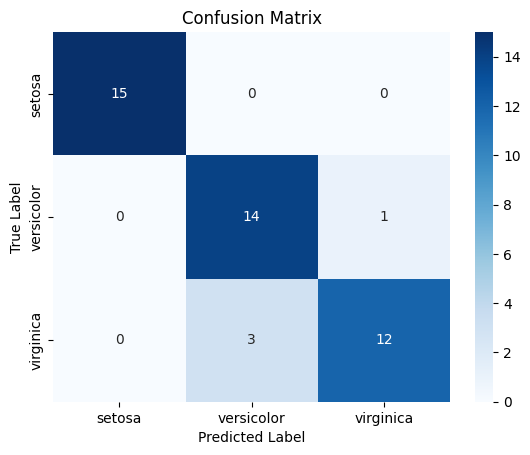

In [ ]:

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluate best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
classification_rep = classification_report(y_test, y_pred, target_names=iris.target_names)


# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [ ]:
# Cell to display the version of imported libraries and Python version
import sklearn
import matplotlib
import pandas as pd
import time
import sys

print(f"Python version: {sys.version}")
print(f"scikit-learn version: {sklearn.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"Time module: Built-in (no version attribute)")


Python version: 3.10.12 (main, Sep 11 2024, 15:47:36) [GCC 11.4.0]
scikit-learn version: 1.5.2
Matplotlib version: 3.8.0
Pandas version: 2.2.2
Time module: Built-in (no version attribute)


In [ ]:
sns.__version__

'0.13.2'